# Diabetics Prediction Using ML

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA Of Data

In [3]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Correlation Matrix

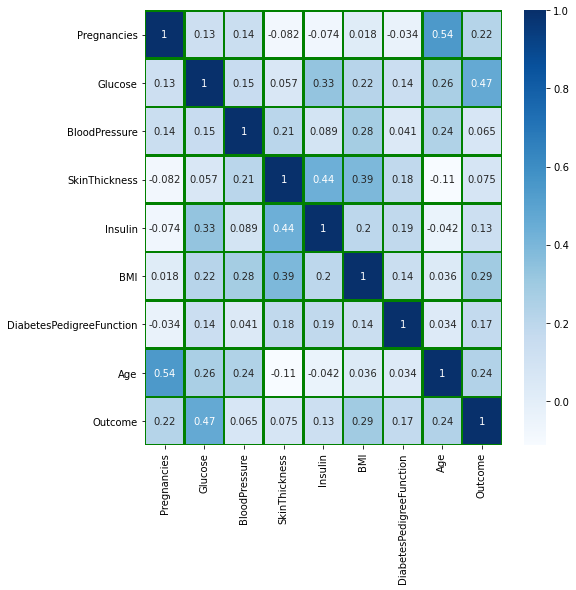

In [10]:
plt.figure(figsize=[8,8])
sns.heatmap(df.corr(),annot=True, cmap='Blues', linecolor='Green', linewidths=1.5)
plt.show()


## Pair Plot of data

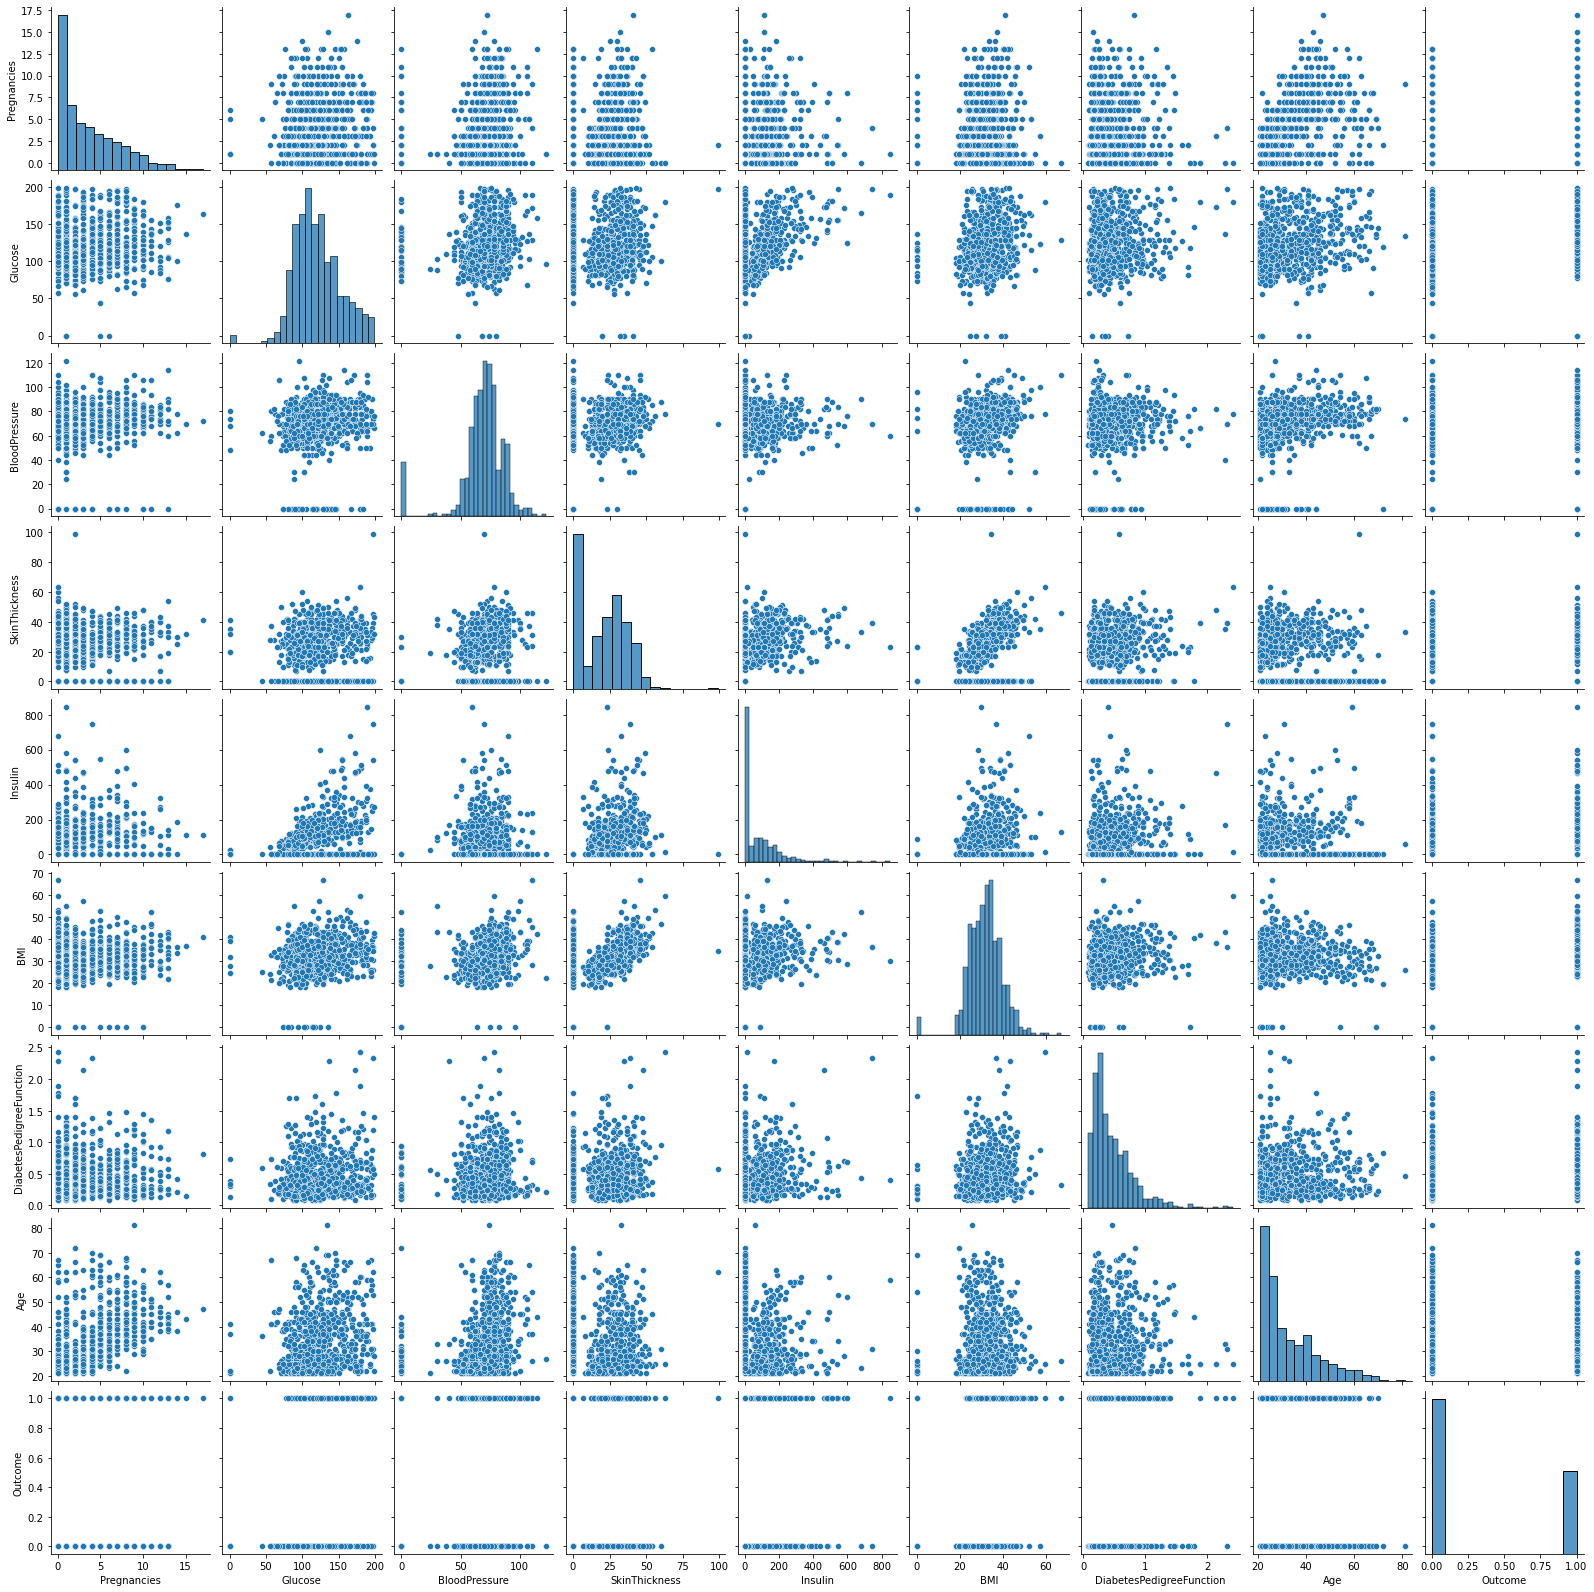

In [11]:
sns.pairplot(df)

## Count plot specifying the number of people suffering from diabeties

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


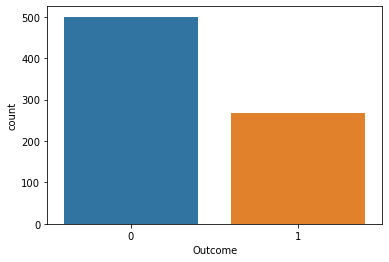

In [13]:
sns.countplot(df['Outcome'])
plt.show()

# Machine Learning Algorithms part

## Separating the data into features and target data

## K Nearest Neighbors Classifier Model¶

In [15]:
X = df.iloc[:,0 :-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=63)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.predict(X_test)
score = knn.score(X_train,y_train)
score1 = knn.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is:",score1)

Accuracy score of Training data is: 0.7914338919925512
Accuracy score of Test data is: 0.7186147186147186


## Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10)
logreg.fit(X_train,y_train)
logreg.predict(X_test)
score = logreg.score(X_train,y_train)
score1 = logreg.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is",score1)

Accuracy score of Training data is: 0.776536312849162
Accuracy score of Test data is 0.7662337662337663


## Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
tre = DecisionTreeClassifier()
tre.fit(X_train,y_train)
tre.predict(X_test)
score= tre.score(X_train,y_train)
score1 =tre.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is:",score1)

Accuracy score of Training data is: 1.0
Accuracy score of Test data is: 0.670995670995671


## Features importance of BarPlot

In [18]:
featur_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Diabetics','Age' ]
features = tre.feature_importances_
features

array([0.06039951, 0.31539288, 0.07430459, 0.0500966 , 0.04898977,
       0.12440048, 0.17701762, 0.14939855])

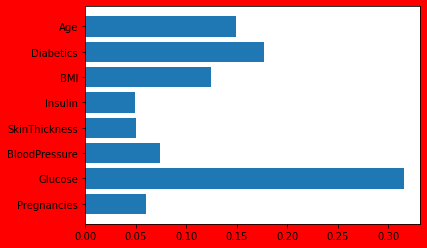

In [19]:
plt.figure(facecolor='r')
plt.barh(featur_names,features)
plt.show()


## Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
forest.predict(X_test)
score = forest.score(X_train,y_train)
score1 = forest.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is:",score1)

Accuracy score of Training data is: 1.0
Accuracy score of Test data is: 0.7748917748917749


## Tuning the parameters of model to get improved results

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0)
forest.fit(X_train,y_train)
forest.predict(X_test)
score = forest.score(X_train,y_train)
score1 = forest.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is:",score1)

Accuracy score of Training data is: 0.8566108007448789
Accuracy score of Test data is: 0.7748917748917749


## Feature importance of barplot

In [23]:
forest1 = forest.feature_importances_
forest1

array([0.0869968 , 0.24601035, 0.09675333, 0.06619674, 0.06703874,
       0.16082348, 0.11978361, 0.15639694])

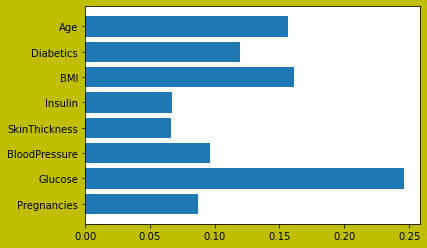

In [24]:
plt.figure(facecolor='y')
plt.barh(featur_names, forest1)
plt.show()

## Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()
grad.fit(X_train,y_train)
grad.predict(X_test)
score = grad.score(X_train,y_train)
score1 = grad.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is:",score1)

Accuracy score of Training data is: 0.9199255121042831
Accuracy score of Test data is: 0.7316017316017316


## Tuning the parameters of model to reduce overfitting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(max_depth=1)
grad.fit(X_train,y_train)
grad.predict(X_test)
score = grad.score(X_train,y_train)
score1 = grad.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is:",score1)

Accuracy score of Training data is: 0.8081936685288641
Accuracy score of Test data is: 0.7532467532467533


## Tuning the parameters of model to get improved results

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(learning_rate=0.1)
grad.fit(X_train,y_train)
grad.predict(X_test)
score = grad.score(X_train,y_train)
score1 = grad.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is:",score1)

Accuracy score of Training data is: 0.9199255121042831
Accuracy score of Test data is: 0.7402597402597403


## Feature importance of barplot

In [28]:
gradf = grad.feature_importances_
gradf

array([0.04673588, 0.38864521, 0.0501451 , 0.01753894, 0.03846589,
       0.16486874, 0.13395905, 0.15964119])

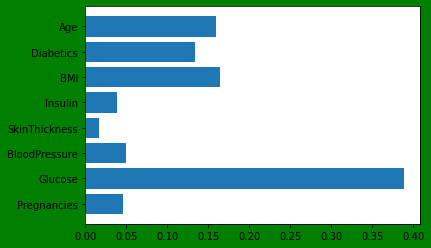

In [29]:
plt.figure(facecolor='g')
plt.barh(featur_names, gradf)
plt.show()

## Support Vector Machines Model

In [30]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
svm.predict(X_test)
score = svm.score(X_train, y_train)
score1 = svm.score(X_test, y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is:",score1)

Accuracy score of Training data is: 0.7746741154562383
Accuracy score of Test data is: 0.7619047619047619
